In [6]:
import numpy as np
from scipy import stats
import pylab as pl
%matplotlib inline

In [3]:
# Define our test distribution: a mix of Cauchy-distributed variables
np.random.seed(0)
x = np.concatenate([stats.cauchy(-5, 1.8).rvs(500),
                    stats.cauchy(-4, 0.8).rvs(2000),
                    stats.cauchy(-1, 0.3).rvs(500),
                    stats.cauchy(2, 0.8).rvs(1000),
                    stats.cauchy(4, 1.5).rvs(500)])

# truncate values to a reasonable range
x = x[(x > -15) & (x < 15)]

In [5]:
x.size

4323

(array([0.00376685, 0.00580723, 0.01985446, 0.1169294 , 0.07172716,
        0.06694012, 0.03861025, 0.00933866, 0.00463009, 0.001648  ]),
 array([-14.97136966, -12.0237102 ,  -9.07605075,  -6.12839129,
         -3.18073183,  -0.23307238,   2.71458708,   5.66224653,
          8.60990599,  11.55756545,  14.5052249 ]),
 <a list of 10 Patch objects>)

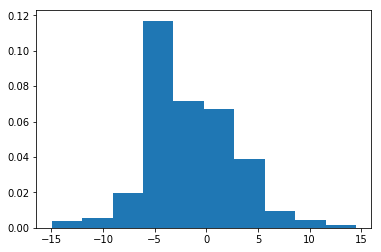

In [9]:
pl.hist(x, normed=True)

(array([0.00313904, 0.00392381, 0.00392381, 0.00313904, 0.00235428,
        0.00313904, 0.00549333, 0.00392381, 0.00470857, 0.00392381,
        0.00235428, 0.00313904, 0.00549333, 0.00392381, 0.00627809,
        0.00549333, 0.00549333, 0.01020189, 0.00706285, 0.00863237,
        0.00784761, 0.00706285, 0.01334094, 0.01177142, 0.01726474,
        0.0141257 , 0.02040379, 0.02668188, 0.03295997, 0.04708566,
        0.03766853, 0.05571804, 0.06513517, 0.07141326, 0.10751227,
        0.17029315, 0.18206457, 0.20246836, 0.14831984, 0.12870082,
        0.08004563, 0.06670469, 0.04865519, 0.0463009 , 0.05571804,
        0.05257899, 0.09652561, 0.13497891, 0.09103229, 0.04473138,
        0.03139044, 0.0321752 , 0.04551614, 0.05100947, 0.05493328,
        0.08004563, 0.10829703, 0.09181705, 0.10123418, 0.07298278,
        0.06356565, 0.05022471, 0.04943995, 0.04708566, 0.03845329,
        0.03374473, 0.03766853, 0.02354283, 0.02511235, 0.01726474,
        0.01177142, 0.02040379, 0.00706285, 0.01

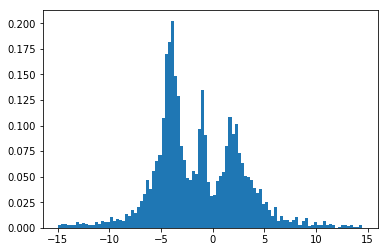

In [10]:
pl.hist(x,bins=100, normed=True)

In [12]:
# copy and sort the array
t = np.sort(x)
N = t.size

# create length-(N + 1) array of cell edges
edges = np.concatenate([t[:1],
                        0.5 * (t[1:] + t[:-1]),
                        t[-1:]])
block_length = t[-1] - edges

# arrays needed for the iteration
nn_vec = np.ones(N)
best = np.zeros(N, dtype=float)
last = np.zeros(N, dtype=int)

In [ ]:
for K in range(N):
        # Compute the width and count of the final bin for all possible
        # locations of the K^th changepoint
        width = block_length[:K + 1] - block_length[K + 1]
        count_vec = np.cumsum(nn_vec[:K + 1][::-1])[::-1]

        # evaluate fitness function for these possibilities
        fit_vec = count_vec * (np.log(count_vec) - np.log(width))
        fit_vec -= 4  # 4 comes from the prior on the number of changepoints
        fit_vec[1:] += best[:K]

        # find the max of the fitness: this is the K^th changepoint
        i_max = np.argmax(fit_vec)
        last[K] = i_max
        best[K] = fit_vec[i_max]

In [34]:
def get_bins(K):
        # Compute the width and count of the final bin for all possible
        # locations of the K^th changepoint
        width = block_length[:K + 1] - block_length[K + 1]
        print(width)
        count_vec = np.cumsum(nn_vec[:K + 1][::-1])[::-1]
        print(count_vec)

        # evaluate fitness function for these possibilities
        fit_vec = count_vec * (np.log(count_vec) - np.log(width))
        fit_vec -= 4  # 4 comes from the prior on the number of changepoints
        fit_vec[1:] += best[:K]
        print(fit_vec)

        # find the max of the fitness: this is the K^th changepoint
        i_max = np.argmax(fit_vec)
        last[K] = i_max
        best[K] = fit_vec[i_max]

In [36]:
get_bins(10)

[0.63865847 0.62268772 0.51899942 0.4032912  0.30637483 0.21947964
 0.16978928 0.12931464 0.09380074 0.04358767 0.01402191]
[11. 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]
[27.30908785 23.76295232 23.31020581 19.90030361 17.90199295 15.84953158
 12.91317533  9.72720457  6.39558431  3.65225646  0.267134  ]
